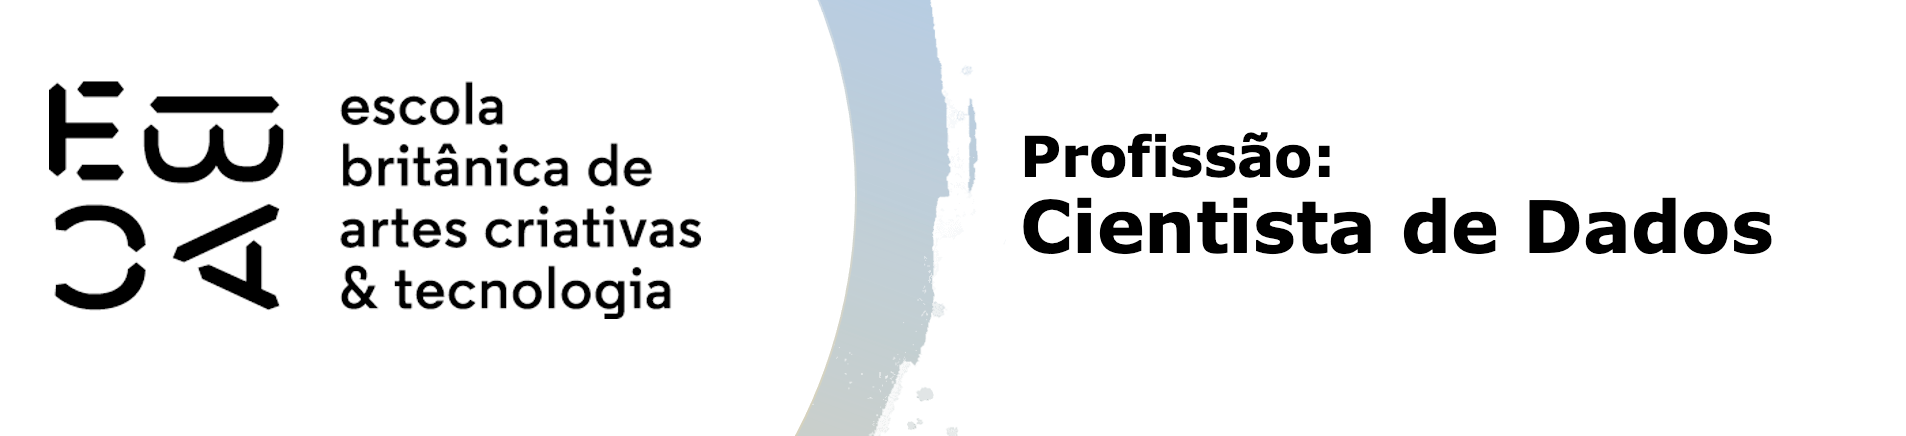

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [205]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
 13  dia_semana    

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [7]:
df['dia_semana'] = df['Data Emissão'].dt.dayofweek #Dia da semana (0 = segunda-feira, 6 = domingo)
df['fim_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0) #Dummy para fim de semana (1 = sim, 0 = não)
df['dia_mes'] = df['Data Emissão'].dt.day
df['trimestre'] = df['Data Emissão'].dt.quarter

In [8]:
df.iloc[:,-4:]

,dia_semana,fim_de_semana,dia_mes,trimestre
0,4,0,30,2
1,4,0,30,2
2,4,0,30,2
3,4,0,30,2
4,4,0,30,2
...,...,...,...,...
187641,3,0,7,1
187642,3,0,7,1
187643,3,0,7,1
187644,3,0,7,1


In [9]:

df['valor_nf_q5'] = pd.qcut(df['Valor NF'], q=5, labels=False)
df['valor_nf_q10'] = pd.qcut(df['Valor NF'], q=10, labels=False)
df['valor_nf_q20'] = pd.qcut(df['Valor NF'], q=20, labels=False)
df['valor_nf_q50'] = pd.qcut(df['Valor NF'], q=50, labels=False)


In [10]:
df.iloc[:,-4:]

,valor_nf_q5,valor_nf_q10,valor_nf_q20,valor_nf_q50
0,1,3,7,17
1,2,5,11,28
2,1,3,7,19
3,3,7,15,38
4,3,7,15,39
...,...,...,...,...
187641,4,8,17,44
187642,4,9,18,46
187643,3,7,15,39
187644,2,5,10,26


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [12]:
metadados = pd.DataFrame({'dtype':df.dtypes})
metadados['papel'] = ['resposta' if x in ['flag_credito','Retorno'] else 'covariavel' for x in df.columns.tolist()]

In [13]:
metadados['nunique'] = df.nunique()
metadados

,dtype,papel,nunique
CNPJ emit.,object,covariavel,19606
Emitente,object,covariavel,15575
No.,int64,covariavel,124400
Data Emissão,datetime64[ns],covariavel,1815
Valor NF,float64,covariavel,33658
Data Registro,datetime64[ns],covariavel,1817
Créditos,float64,covariavel,9717
Situação do Crédito,category,covariavel,3
Ano,int64,covariavel,5
Semestre,int64,covariavel,2


In [14]:
pd.crosstab(df['categoria'], df['flag_credito'], margins=True, margins_name='total')

flag_credito,0,1,total
categoria,,,
Alimentos,2092,12868,14960
Auto posto,3418,271,3689
Construção,18425,13811,32236
Farmácia,10054,4886,14940
Mercado,22887,19808,42695
Restaurantes,22631,17118,39749
Varejo,4869,1035,5904
Vestuário,1813,1799,3612
não definido,16819,13042,29861


In [15]:
def IV(tabela: pd.DataFrame, variavel: str, resposta: str) -> float:

    tab = pd.crosstab(index=tabela[variavel], columns=tabela[resposta], margins=True, margins_name="Total")
    tab["perc_nao_evento"] = tab[0] / tab.loc["Total", 0]
    tab["perc_evento"] = tab[1] / tab.loc["Total", 1]
    tab["WOE"] = np.log(tab["perc_evento"].replace(0, np.nan) / tab["perc_nao_evento"].replace(0, np.nan))
    tab["IV parcial"] = (tab["perc_evento"] - tab["perc_nao_evento"]) * tab["WOE"]

    return tab["IV parcial"].sum()




In [16]:
%%time

metadados["IV"] = [f"{IV(tabela=df, variavel=x, resposta='flag_credito'):.2%}" for x in metadados.index]
metadados  #

CPU times: total: 17.3 s
Wall time: 17.4 s


,dtype,papel,nunique,IV
CNPJ emit.,object,covariavel,19606,152.48%
Emitente,object,covariavel,15575,214.09%
No.,int64,covariavel,124400,13.90%
Data Emissão,datetime64[ns],covariavel,1815,48.04%
Valor NF,float64,covariavel,33658,46.48%
Data Registro,datetime64[ns],covariavel,1817,95.08%
Créditos,float64,covariavel,9717,0.00%
Situação do Crédito,category,covariavel,3,0.03%
Ano,int64,covariavel,5,4.17%
Semestre,int64,covariavel,2,0.13%


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
  

    - <font color='lightblue'>CNPJ emit :  152.48%</font>
    - <font color='lightblue'>Data Registro: 95.08%</font>
    - <font color='lightblue'>Emitente:   214.09%</font>
    - <font color='blue'>Data Emissão:   48.04%</font>
    - <font color='blue'>Categoria:   40.83%</font>


- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

> <font color='blue'>As variáveis Data Emissão e categoria se destacam como as que apresentam o maior poder de discriminação, conforme indicado pelos valores do IV. Esses resultados sugerem que essas variáveis têm uma capacidade significativa de diferenciar entre os eventos de interesse.</font>

><font color='blue'>
A análise das categorizações por quantis da variável Valor NF sugere que, à medida que aumentamos o número de categorias, há uma tendência de aumento na relação entre a variável e o IV. Isso indica que uma maior discretização da variável contínua pode proporcionar uma melhor captura das variações nos dados e, consequentemente, uma maior capacidade de discriminação.</font>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [19]:
df_ = df[df['Ano'] >= 2020]

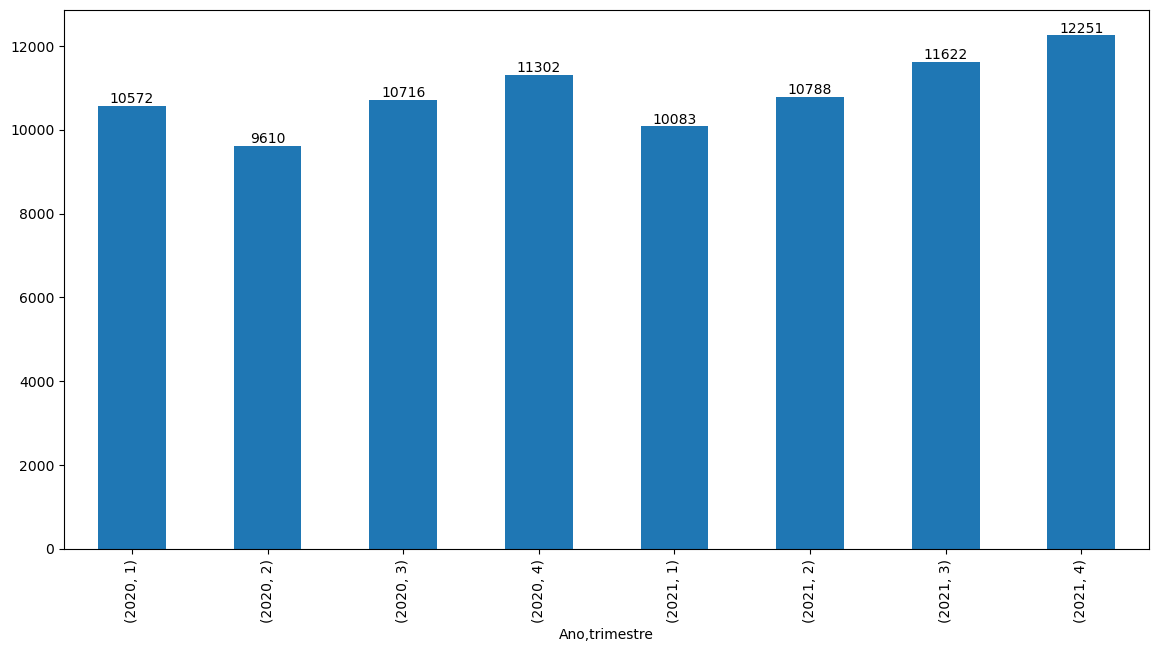

In [20]:
ax = df_.groupby(by=["Ano", "trimestre"])["No."].count().plot.bar(figsize=(14, 7))
ax.bar_label(ax.containers[0]) 
plt.show()

In [21]:
df_ = df_.assign(Periodo=df[["Ano", "trimestre"]].astype(dtype=str).agg('_'.join, axis=1))

<Figure size 1500x600 with 0 Axes>

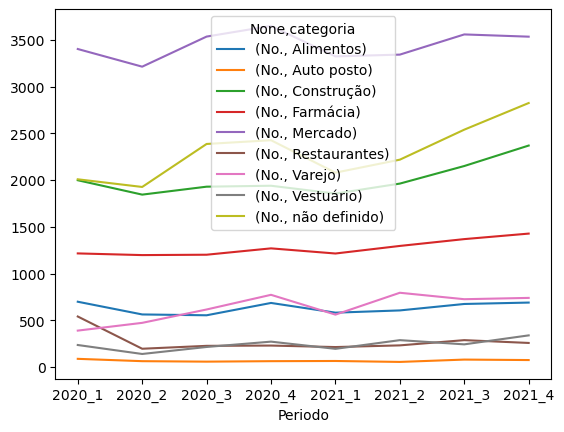

In [53]:
import seaborn as sns
plt.figure(figsize=(15,6))
df_.groupby(['Periodo','categoria'])[['No.']].count().unstack().plot()
plt.show()

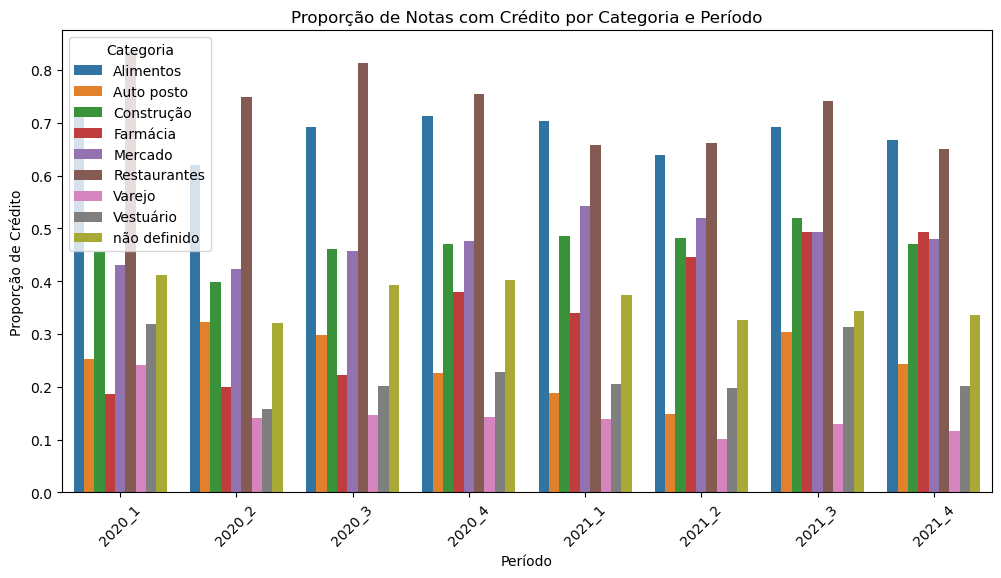

In [85]:
df_com_credito = df_[df_['flag_credito'] == 1]

proporcao_credito = (
    df_com_credito.groupby(['Periodo', 'categoria'])
    .size()
    .div(df_.groupby(['Periodo', 'categoria']).size())
    .reset_index(name='proporcao_credito')
)


plt.figure(figsize=(12, 6))
sns.barplot(data=proporcao_credito, x='Periodo', y='proporcao_credito', hue='categoria')
plt.title("Proporção de Notas com Crédito por Categoria e Período")
plt.xlabel("Período")
plt.ylabel("Proporção de Crédito")
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()

In [87]:
proporcao_credito

,Periodo,categoria,proporcao_credito
0,2020_1,Alimentos,0.714900
1,2020_1,Auto posto,0.252874
2,2020_1,Construção,0.455455
3,2020_1,Farmácia,0.186008
4,2020_1,Mercado,0.430629
...,...,...,...
67,2021_4,Mercado,0.480192
68,2021_4,Restaurantes,0.649805
69,2021_4,Varejo,0.116373
70,2021_4,Vestuário,0.201183


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [24]:
group = df_.groupby(['Periodo','categoria','flag_credito']).count()['CNPJ emit.'].to_frame().rename(columns={"CNPJ emit.":"Freq"})

In [25]:
group

Freq
Periodo categoria    flag_credito      
2020_1  Alimentos    0              199
                     1              499
        Auto posto   0               65
                     1               22
        Construção   0             1088
...                                 ...
2021_4  Varejo       1               86
        Vestuário    0              270
                     1               68
        não definido 0             1872
                     1              952

[144 rows x 1 columns]

In [26]:
tab = group.unstack()['Freq']
tab

flag_credito             0     1
Periodo categoria               
2020_1  Alimentos      199   499
        Auto posto      65    22
        Construção    1088   910
        Farmácia       989   226
        Mercado       1937  1465
...                    ...   ...
2021_4  Mercado       1837  1697
        Restaurantes    90   167
        Varejo         653    86
        Vestuário      270    68
        não definido  1872   952

[72 rows x 2 columns]

In [27]:
tab['N'] = tab.sum(axis=1)
tab['tx_evento'] = tab[1]/tab.N
tab.reset_index()
tab

flag_credito             0     1     N  tx_evento
Periodo categoria                                
2020_1  Alimentos      199   499   698   0.714900
        Auto posto      65    22    87   0.252874
        Construção    1088   910  1998   0.455455
        Farmácia       989   226  1215   0.186008
        Mercado       1937  1465  3402   0.430629
...                    ...   ...   ...        ...
2021_4  Mercado       1837  1697  3534   0.480192
        Restaurantes    90   167   257   0.649805
        Varejo         653    86   739   0.116373
        Vestuário      270    68   338   0.201183
        não definido  1872   952  2824   0.337110

[72 rows x 4 columns]

In [97]:
df_.columns

Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria', 'dia_semana', 'fim_de_semana',
       'dia_mes', 'trimestre', 'valor_nf_q5', 'valor_nf_q10', 'valor_nf_q20',
       'valor_nf_q50', 'Periodo'],
      dtype='object')

In [99]:
tab

flag_credito             0     1     N  tx_evento
Periodo categoria                                
2020_1  Alimentos      199   499   698   0.714900
        Auto posto      65    22    87   0.252874
        Construção    1088   910  1998   0.455455
        Farmácia       989   226  1215   0.186008
        Mercado       1937  1465  3402   0.430629
...                    ...   ...   ...        ...
2021_4  Mercado       1837  1697  3534   0.480192
        Restaurantes    90   167   257   0.649805
        Varejo         653    86   739   0.116373
        Vestuário      270    68   338   0.201183
        não definido  1872   952  2824   0.337110

[72 rows x 4 columns]

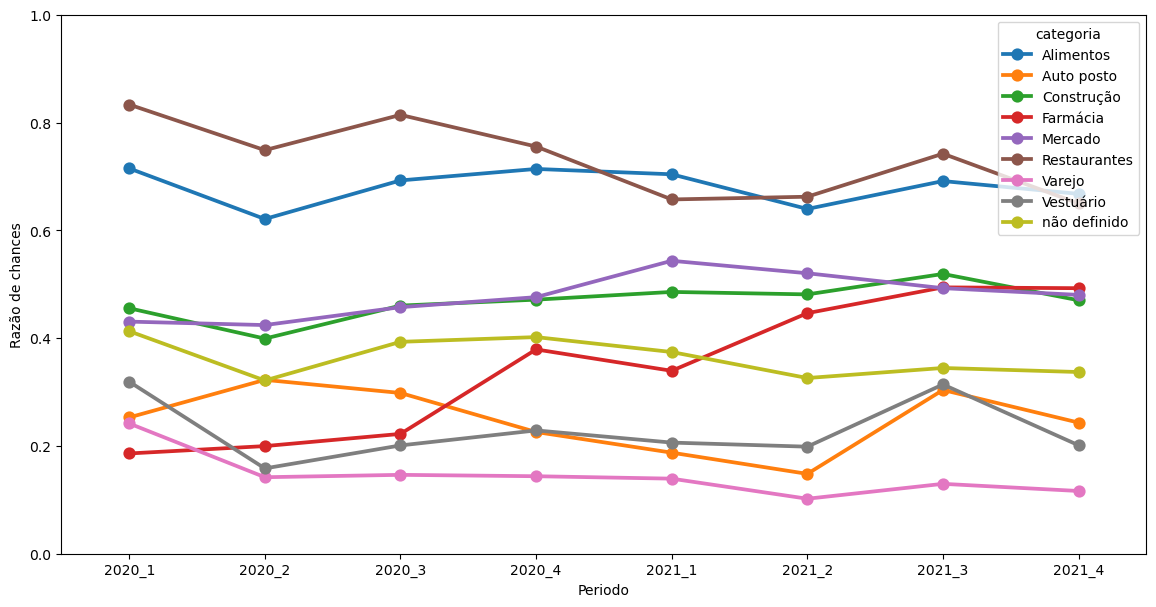

In [113]:
fig, ax = plt.subplots(figsize=(10,7))

sns.pointplot(data=tab.reset_index(), x='Periodo', y='tx_evento', hue='categoria', errorbar=None, ax=ax)
ax.set_ylim([0, tab.tx_evento.max()*1.2]);
ax.set_ylabel('Razão de chances');


In [117]:
tab['pct_evento']     = tab[1]/tab[1].groupby(level=0).sum()
tab['pct_nao_evento'] = tab[0]/tab[0].groupby(level=0).sum()
tab['WOE'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab.head()

flag_credito           0     1     N  tx_evento  pct_evento  pct_nao_evento  \
Periodo categoria                                                             
2020_1  Alimentos    199   499   698   0.714900    0.109190        0.033156   
        Auto posto    65    22    87   0.252874    0.004814        0.010830   
        Construção  1088   910  1998   0.455455    0.199125        0.181273   
        Farmácia     989   226  1215   0.186008    0.049453        0.164778   
        Mercado     1937  1465  3402   0.430629    0.320569        0.322726   

flag_credito             WOE  
Periodo categoria             
2020_1  Alimentos   1.191881  
        Auto posto -0.810765  
        Construção  0.093928  
        Farmácia   -1.203580  
        Mercado    -0.006706

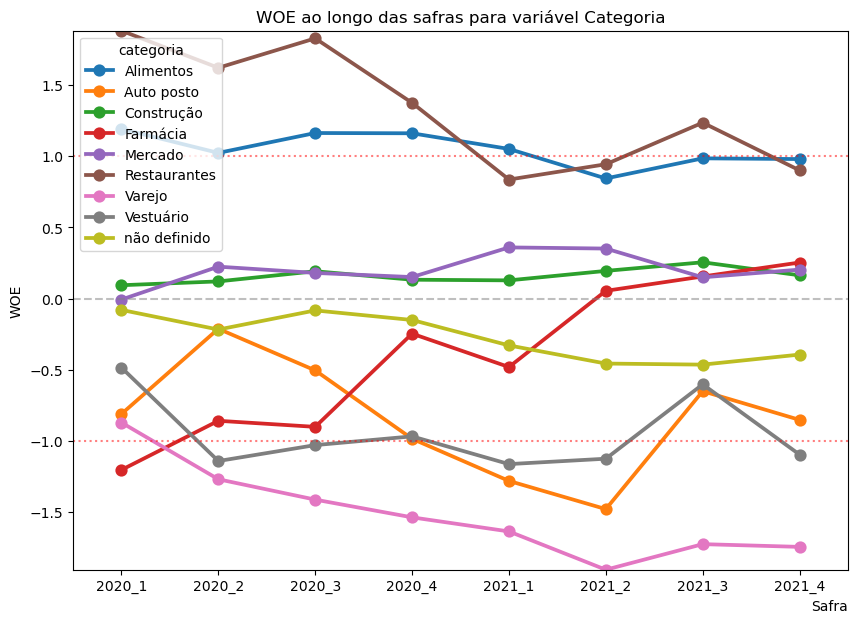

In [151]:
fig, ax = plt.subplots(figsize=(10,7))
variavel='categoria'

# Comando principal do gráfico
sns.pointplot(data=tab.reset_index(), y = 'WOE', x = 'Periodo', hue=variavel, ax=ax);

#limites do gráfico - mostrando 1 e -1 para ter referência
ymax = max(1.2, max(tab.WOE))
ymin = min(-1.2, min(tab.WOE))
ax.set_ylim([ymin, ymax])

# Linhas de referência
ax.axhline(1, linestyle=':'  , color='red', alpha=.5)
ax.axhline(0, linestyle='--' , color='grey', alpha=.5)
ax.axhline(-1, linestyle=':' , color='red', alpha=.5)

# Títulos
ax.set_title(f'WOE ao longo das safras para variável {variavel.capitalize()}')
ax.set_xlabel('Safra', loc='right');

In [155]:
tab.head()

flag_credito           0     1     N  tx_evento  pct_evento  pct_nao_evento  \
Periodo categoria                                                             
2020_1  Alimentos    199   499   698   0.714900    0.109190        0.033156   
        Auto posto    65    22    87   0.252874    0.004814        0.010830   
        Construção  1088   910  1998   0.455455    0.199125        0.181273   
        Farmácia     989   226  1215   0.186008    0.049453        0.164778   
        Mercado     1937  1465  3402   0.430629    0.320569        0.322726   

flag_credito             WOE  
Periodo categoria             
2020_1  Alimentos   1.191881  
        Auto posto -0.810765  
        Construção  0.093928  
        Farmácia   -1.203580  
        Mercado    -0.006706

In [159]:
((tab.pct_evento - tab.pct_nao_evento)*tab.WOE).to_frame()

0
Periodo categoria             
2020_1  Alimentos     0.090624
        Auto posto    0.004877
        Construção    0.001677
        Farmácia      0.138803
        Mercado       0.000014
...                        ...
2021_4  Mercado       0.012084
        Restaurantes  0.016971
        Varejo        0.134560
        Vestuário     0.028206
        não definido  0.034281

[72 rows x 1 columns]

In [175]:
iv_categoria = ((tab.pct_evento - tab.pct_nao_evento)*tab.WOE).groupby(level=0).sum();
iv_categoria

Periodo
2020_1    0.424159
2020_2    0.301671
2020_3    0.340058
2020_4    0.286660
2021_1    0.316451
2021_2    0.371846
2021_3    0.308010
2021_4    0.296336
dtype: float64

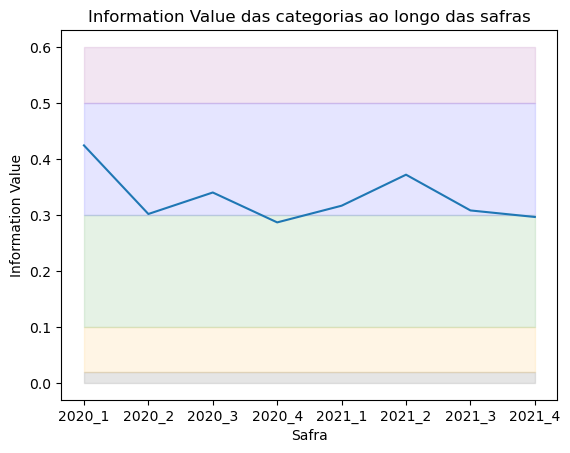

In [173]:
def plot_iv(IV):
    fig, ax = plt.subplots()
    x = IV.index
    a = [.02]*len(IV.index)
    b = [.1]*len(IV.index)
    c = [.3]*len(IV.index)
    d = [.5]*len(IV.index)
    e = [.6]*len(IV.index)

    ax.fill_between(IV.index, a, color='grey', alpha=.2)
    ax.fill_between(IV.index, a, b, color='orange', alpha=.1)
    ax.fill_between(IV.index, b, c, color='green', alpha=.1)
    ax.fill_between(IV.index, c, d, color='blue', alpha=.1)
    ax.fill_between(IV.index, d, e, color='purple', alpha=.1)
    ax.plot(IV)

    ax.set_title("Information Value das categorias ao longo das safras")
    ax.set_ylabel("Information Value")
    ax.set_xlabel("Safra")
    
plot_iv(iv_categoria)

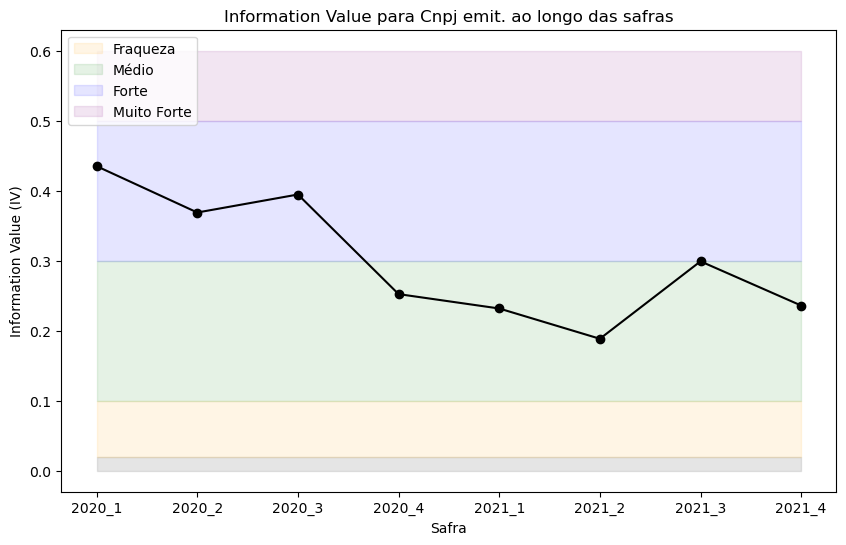

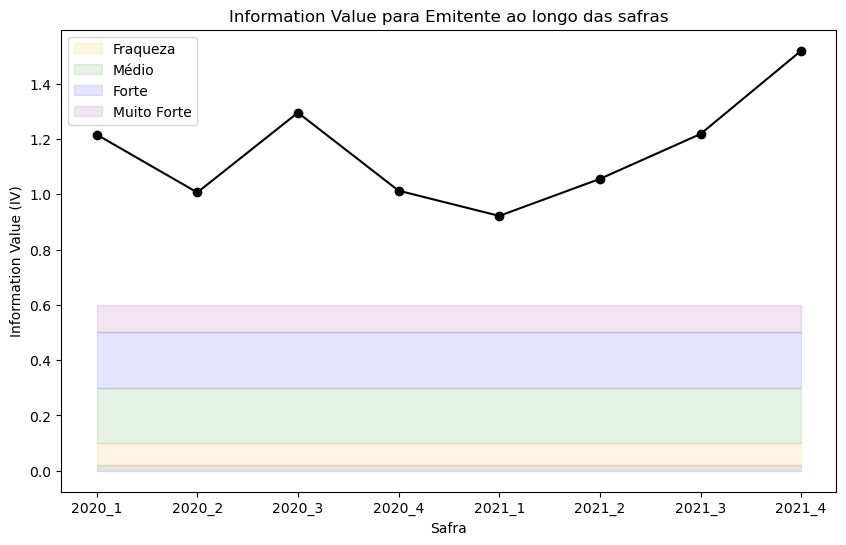

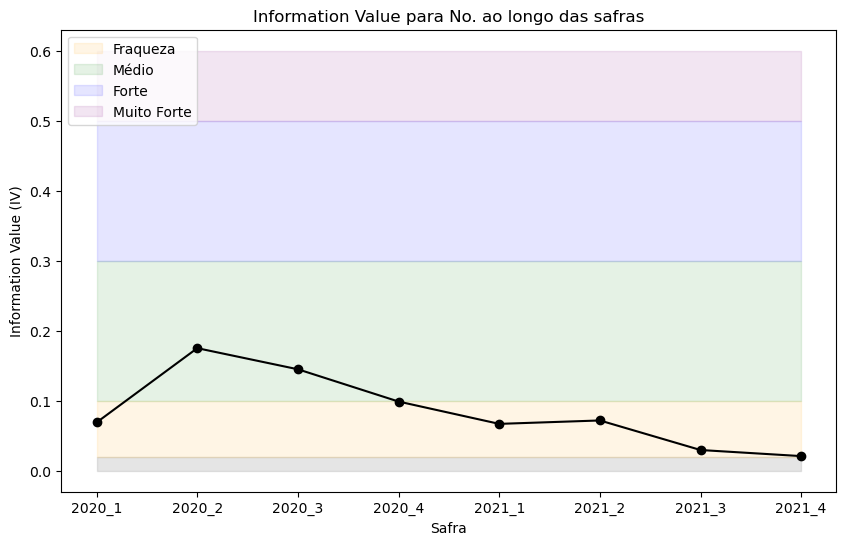

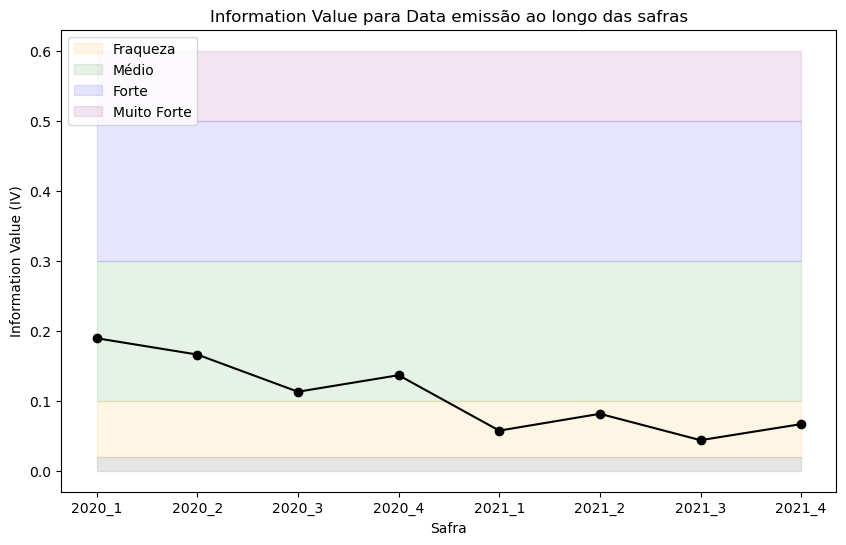

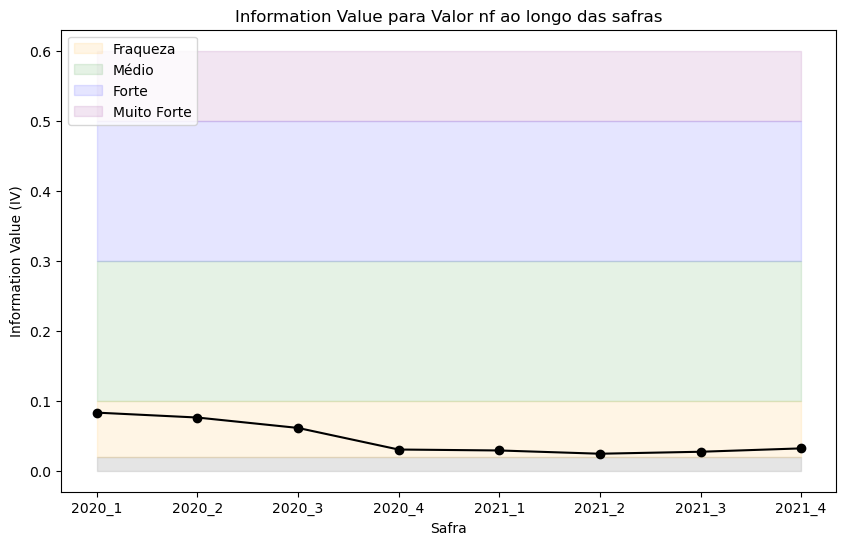

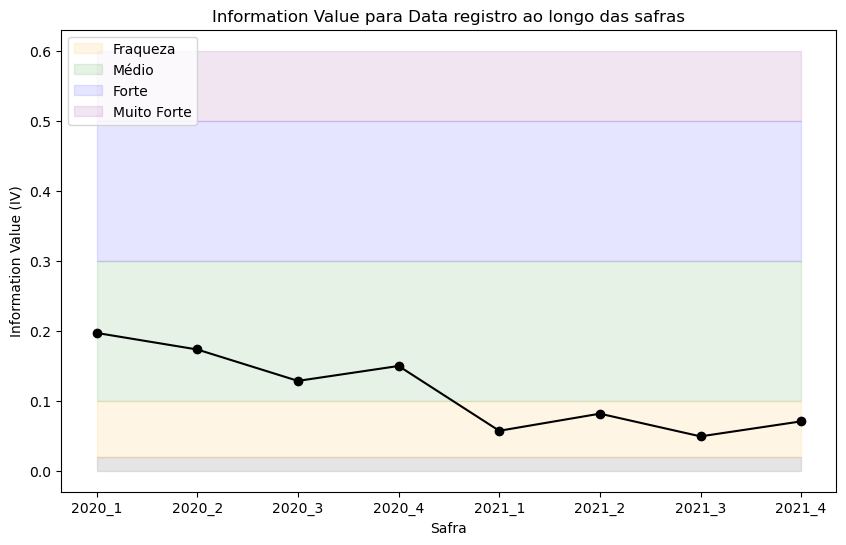

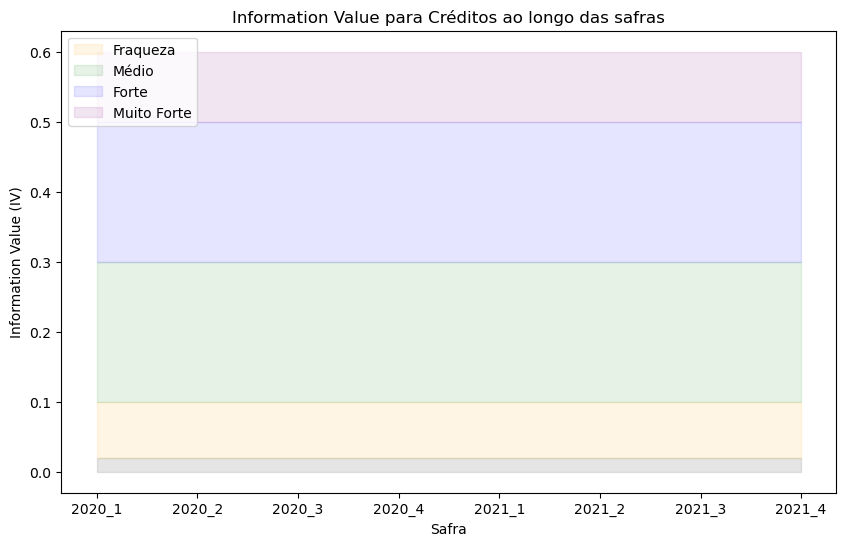

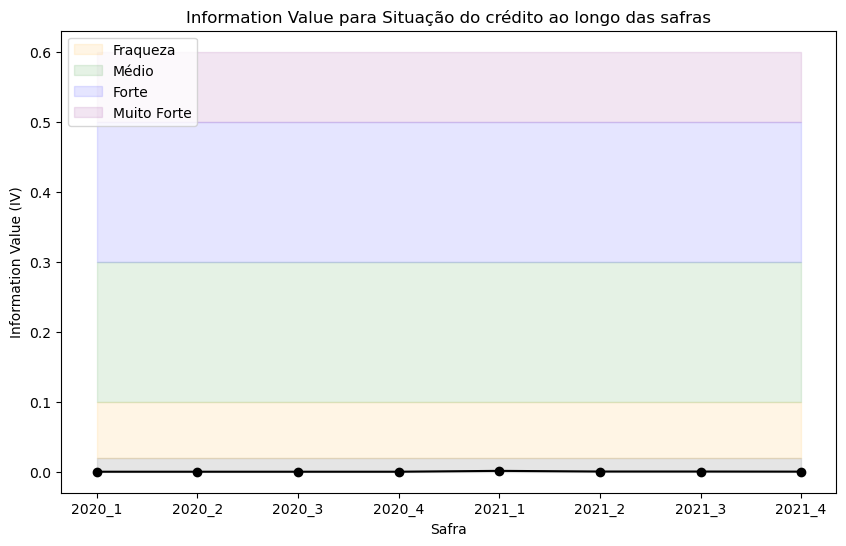

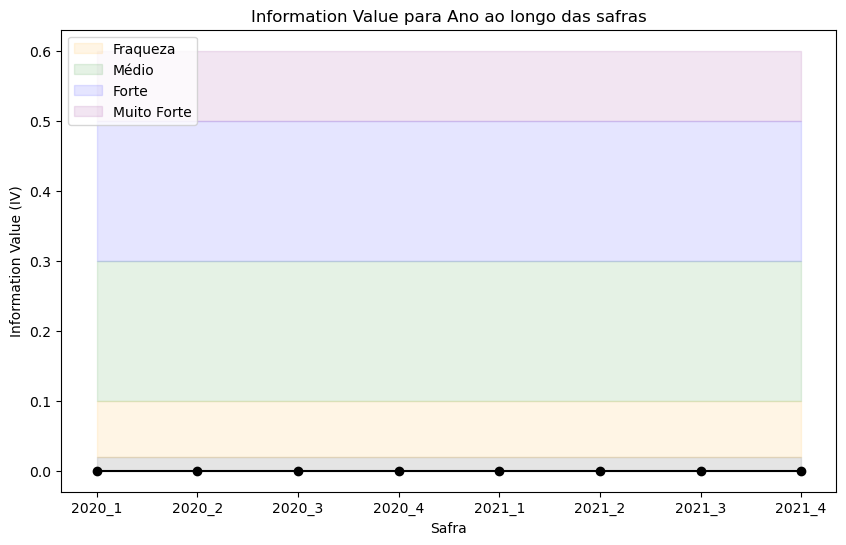

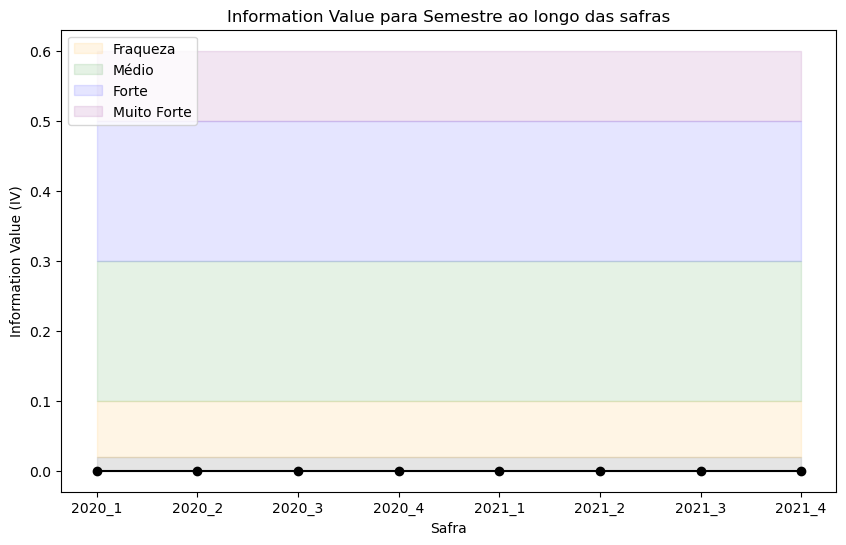

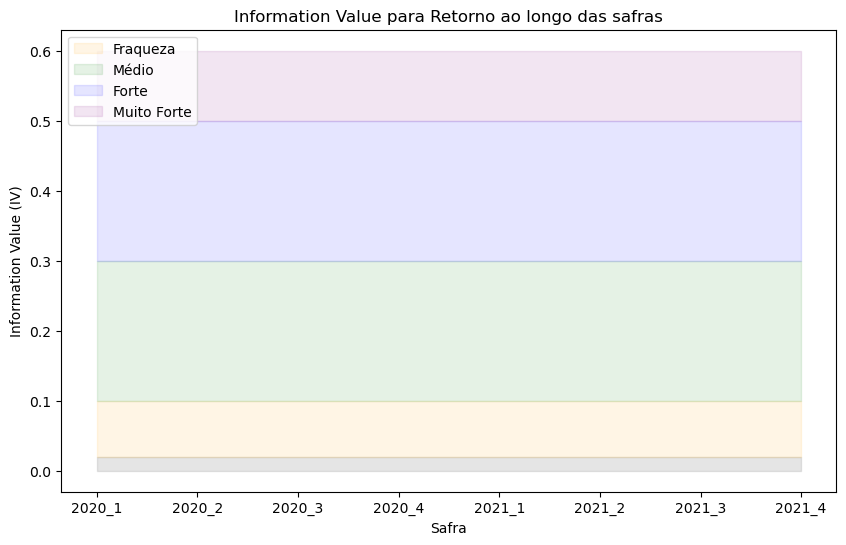

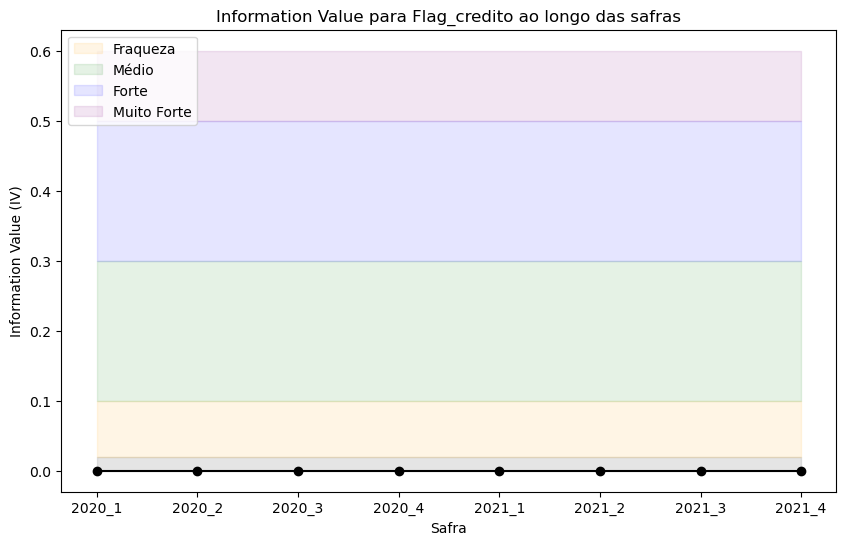

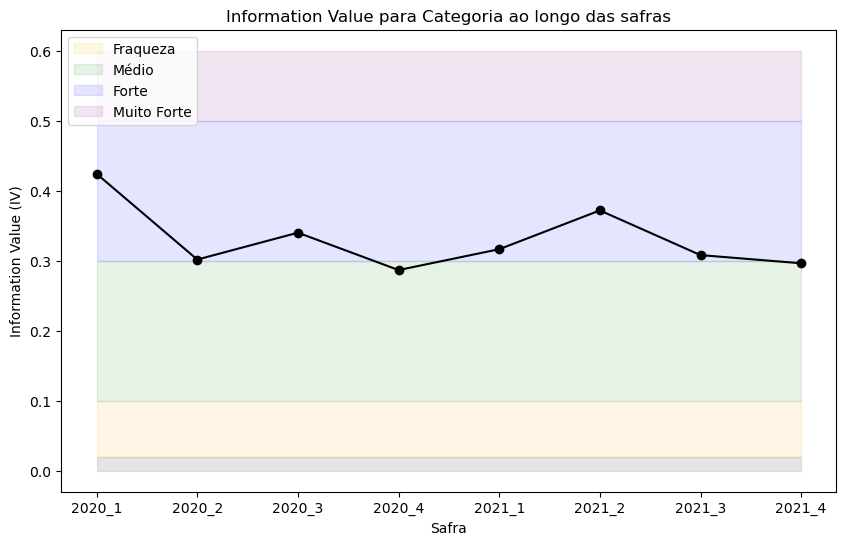

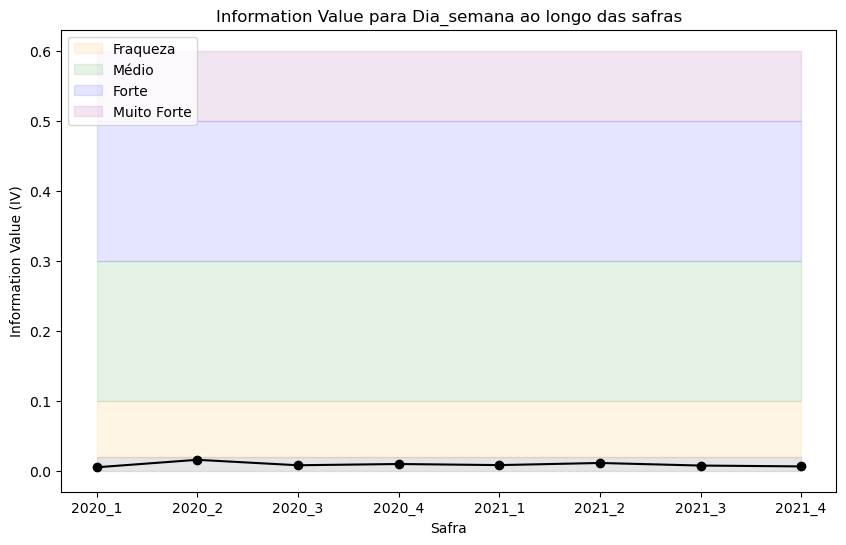

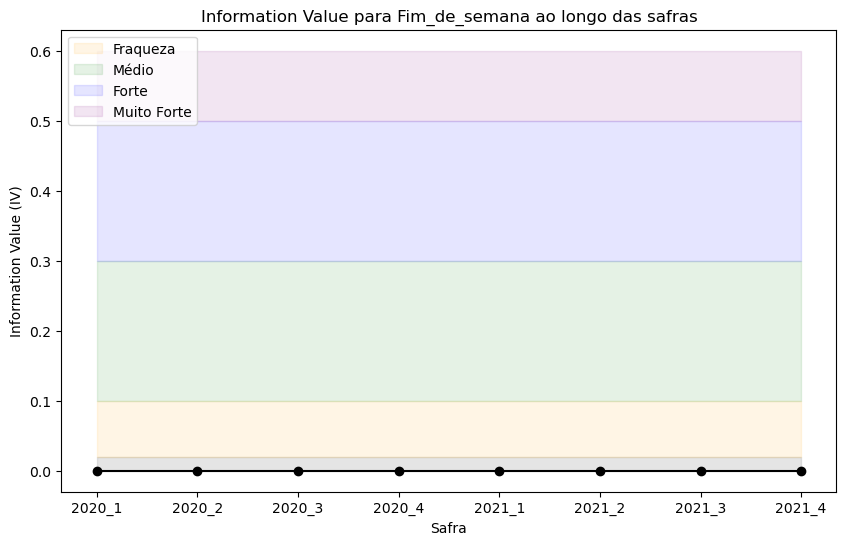

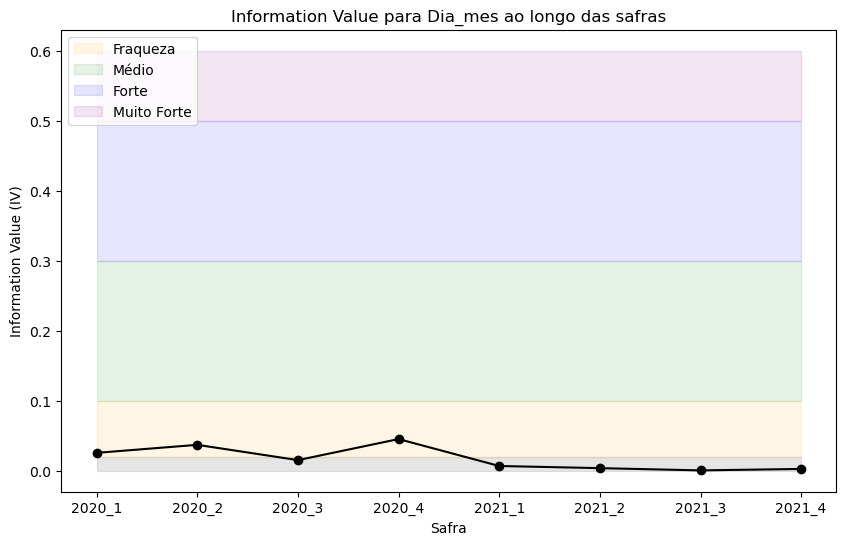

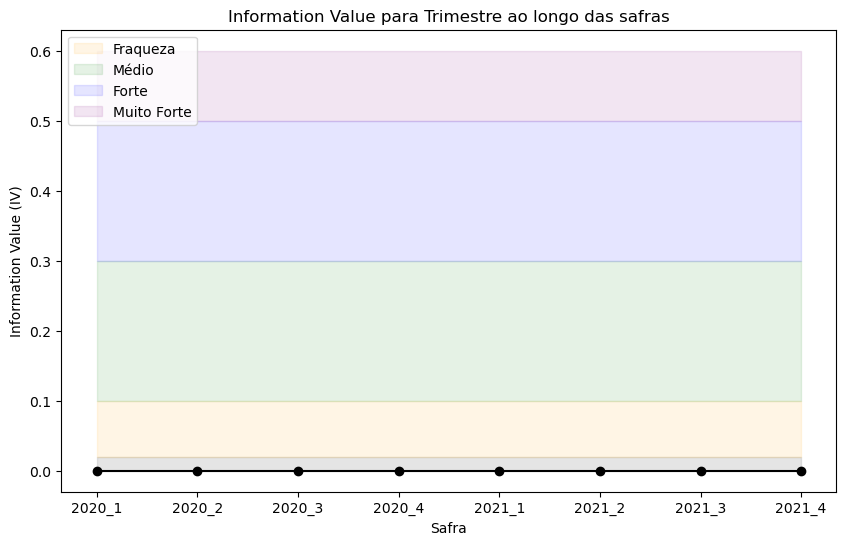

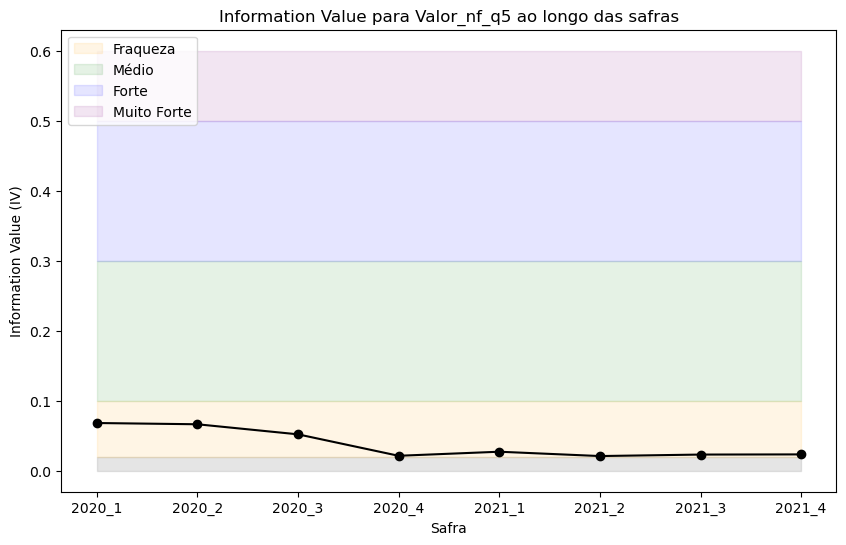

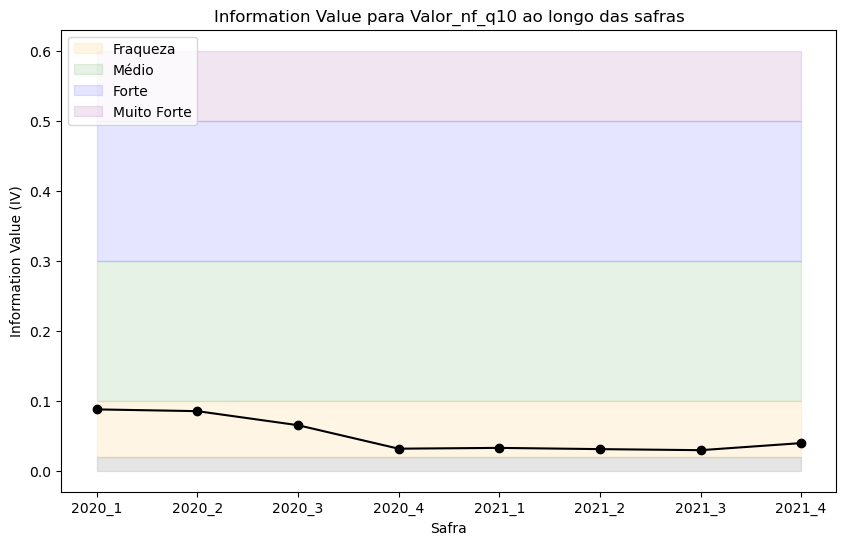

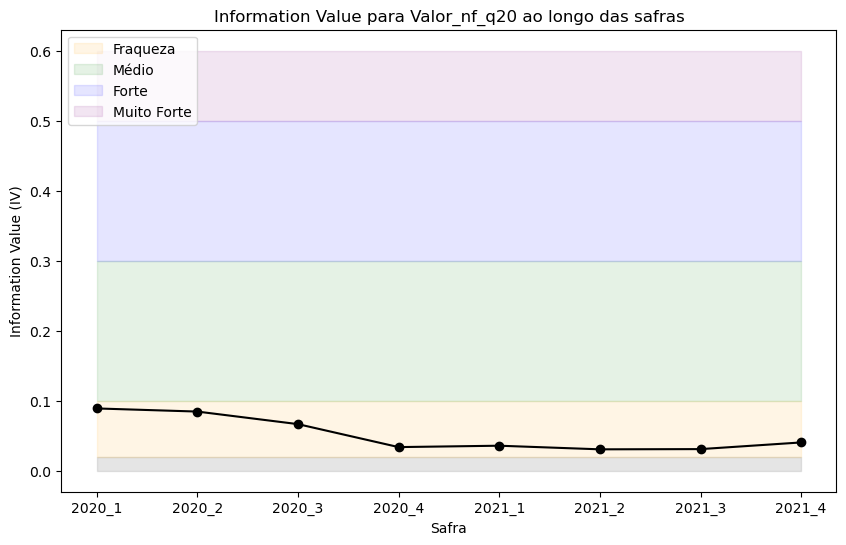

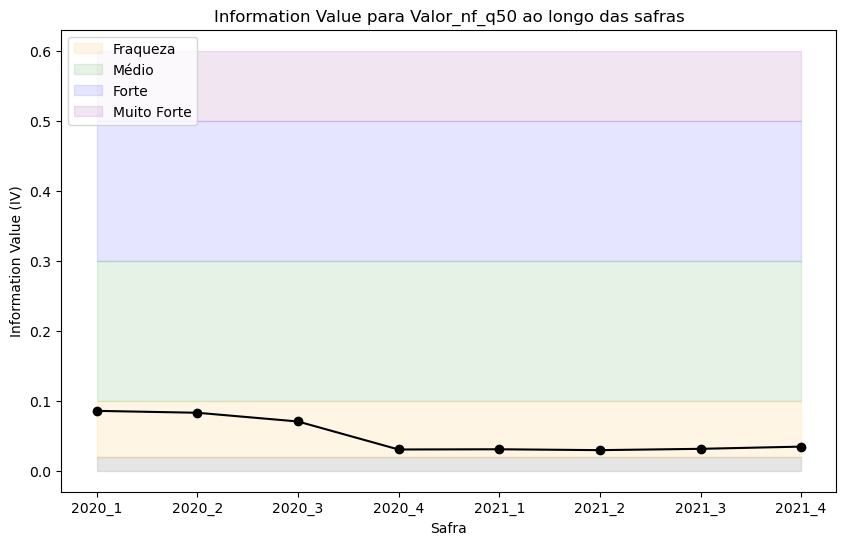

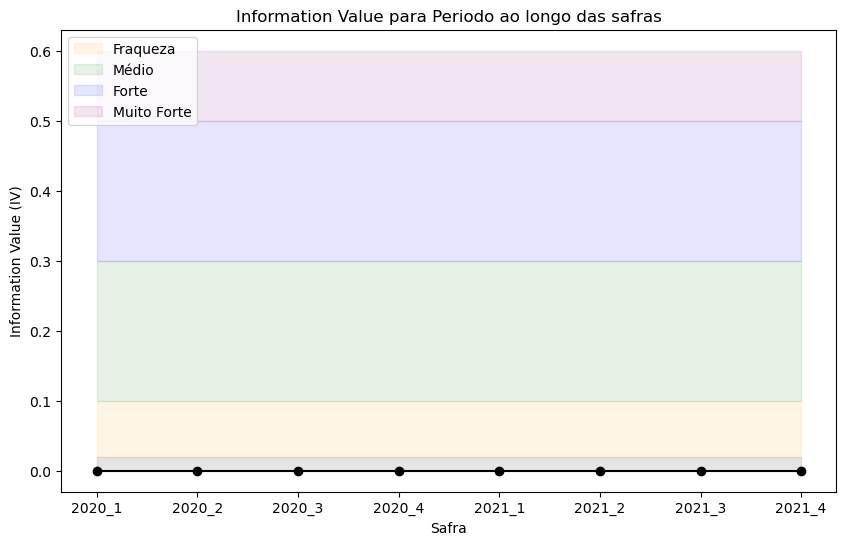

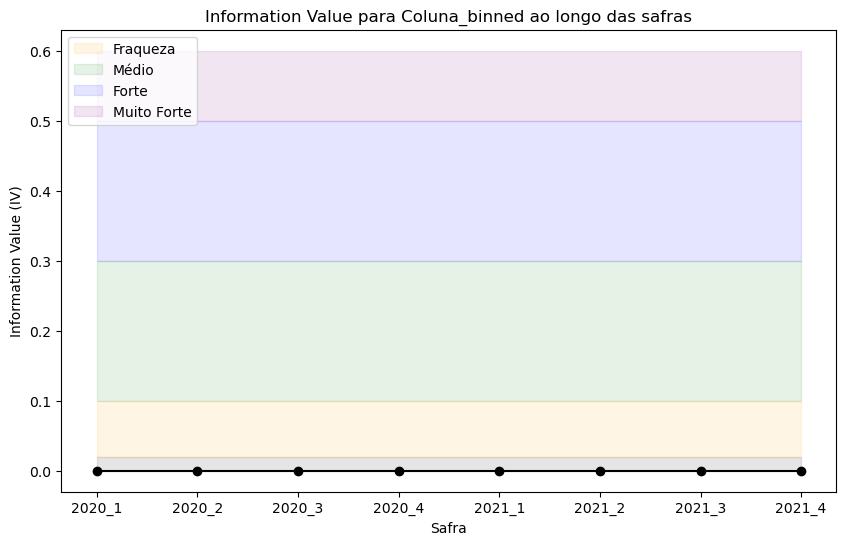

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calcular_iv_e_plotar(df, coluna, target='flag_credito', bins=5):
    # Verifica se a coluna é numérica e discretiza caso seja
    if pd.api.types.is_numeric_dtype(df[coluna]):
        df['coluna_binned'] = pd.qcut(df[coluna], q=bins, duplicates='drop')
    else:
        df['coluna_binned'] = df[coluna]

    # Agrupar e calcular a frequência, taxa de evento e outros cálculos para o IV
    group = df.groupby(['Periodo', 'coluna_binned', target]).count()['CNPJ emit.'].to_frame().rename(columns={"CNPJ emit.": "Freq"})
    tab = group.unstack()['Freq']
    tab['N'] = tab.sum(axis=1)
    tab['tx_evento'] = tab[1] / tab.N
    tab['pct_evento'] = tab[1] / tab[1].groupby(level=0).sum()
    tab['pct_nao_evento'] = tab[0] / tab[0].groupby(level=0).sum()
    tab['WOE'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])

    # Cálculo do IV
    iv = ((tab['pct_evento'] - tab['pct_nao_evento']) * tab['WOE']).groupby(level=0).sum()
    
    # Plot do IV ao longo das safras
    fig, ax = plt.subplots(figsize=(10, 6))
    x = iv.index
    a = [.02] * len(iv.index)
    b = [.1] * len(iv.index)
    c = [.3] * len(iv.index)
    d = [.5] * len(iv.index)
    e = [.6] * len(iv.index)

    # Faixas de cores para valores de IV
    ax.fill_between(iv.index, a, color='grey', alpha=.2)
    ax.fill_between(iv.index, a, b, color='orange', alpha=.1, label="Fraqueza")
    ax.fill_between(iv.index, b, c, color='green', alpha=.1, label="Médio")
    ax.fill_between(iv.index, c, d, color='blue', alpha=.1, label="Forte")
    ax.fill_between(iv.index, d, e, color='purple', alpha=.1, label="Muito Forte")
    
    ax.plot(iv, marker='o', color='black')  # Linha do IV ao longo do tempo
    ax.set_title(f"Information Value para {coluna.capitalize()} ao longo das safras")
    ax.set_ylabel("Information Value (IV)")
    ax.set_xlabel("Safra")
    ax.legend(loc='upper left')

    plt.show()


colunas = df_.columns
colunas.drop(['flag_credito','Créditos', 'Situação do Crédito','Retorno'])
for var in colunas:
    calcular_iv_e_plotar(df_,var)



## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

> <font color='blue'>As diferenças observadas nas proporções de notas com retornos acima de zero se mantêm estáveis ao longo do período de análise a partir de 2020, com pequenas oscilações. É importante considerar que, desde janeiro de 2020, o perfil do público parece ter se aproximado do público atual (2022), possivelmente devido a fatores como a pandemia e o crescimento do público. No entanto, ao analisar a base de dados como um todo, podemos notar um desbalanceamento significativo que pode influenciar os resultados de forma considerável.</font>o.

> <font color='blue'>As categorias Mercado, Construção e categoria não definida apresentam as maiores proporções de notas com retornos acima de zero. Esses resultados sugerem que essas categorias têm um desempenho financeiro relativamente melhor em comparação com outras.</font>


Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusã

> <font color='blue'>Conclusão: As categorias Mercado, Construção e categoria não definida destacam-se por apresentar a maior proporção de notas com retornos acima de zero. As diferenças nas proporções observadas a partir de 2020 se mantêm estáveis ao longo do tempo, com pequenas oscilações. Contudo, ao considerar a totalidade da base de dados, é evidente um desbalanceamento que pode impactar de forma significativa a análise.</font>